# Datenanalyse

In diesem Notebook werden die Nachrichtenartikel des Nachrichtensenders `NTV` mit Hilfe einer Sentiment-Analyse und Topic-Modeling untersucht. Als Datengrundlage wird dazu die im Notebook `1-Datengenerierung.ipynb` generierte Datei `data.csv` verwendet.

# Einlesen der Daten

Zum Einlesen der `csv`-Datei wird die Python-Bibliothek `Pandas` verwendet. Wir speichern die Informationen zu den Artikeln und deren Inhalte in der Variable `articles`. Da wir nicht weiter an dem Dateiname interessiert sind, wird dieser anschließend gelöscht.

In [6]:
import pandas as pd

In [7]:
articles_data = pd.read_csv('2-1-data.csv')
articles = pd.DataFrame(articles_data)
articles = articles.drop('filename', axis=1)
articles

,date,category,headline,text
0,2024-05-10,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...
1,2024-05-10,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...
2,2024-05-10,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...
3,2024-05-10,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...
4,2024-05-10,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...
...,...,...,...,...
5110,2024-05-09,wirtschaft,Arbeitsmarktdaten stuetzen die Wall Street,Die Anzahl der Anträge auf Arbeitslosenhilfe i...
5111,2024-05-09,wirtschaft,Arbeitnehmer leisten 1 3 Milliarden Uberstunden,Klagen über eine angeblich mangelnde Arbeitsmo...
5112,2024-05-09,wirtschaft,Google KI soll Verhalten der Molekuele des Leb...,"Mit ""AlphaFold 2"" gelang Google DeepMind ein D..."
5113,2024-05-09,wirtschaft,Die neue Zeit bei Berkshire hat bereits begonnen,Investorenlegende Warren Buffett hat auch mit ...


# Sentiment Analyse

Für die Sentiment-Analyse wird das Python-Package `germansentiment` verwendet. Die Textanalyse für englisch-sprachige Texte ist deutlich ausgereifter als die für deutsche Texte. Das führt insbesondere bei der Sentiment-Analyse zu problemen, da hier die Bedeutung der Worte zur Verfügung stehen muss. Das zuvor genannte Package macht es jedoch auch möglich deutsche Texte zu analysieren.

In [ ]:
from germansentiment import SentimentModel

In [ ]:
sentiment_model = SentimentModel()

## Einlesen der Daten

Zum Einlesen der `csv`-Datei wird die Python-Bibliothek `Pandas` verwendet. Wir speichern die Informationen zu den Artikeln und deren Inhalte in der Variable `articles`. Da wir nicht weiter an dem Dateiname interessiert sind, wird dieser anschließend gelöscht.

In [ ]:
import pandas as pd

In [ ]:
articles_data = pd.read_csv('2-1-data.csv')
articles = pd.DataFrame(articles_data)
articles = articles.drop('filename', axis=1)
articles

## Sentiment-Bestimmung

Das Dataframe wird nun um die Ergebnisse der Sentiment-Analyse erweitert. Dazu werden jeweils die Spalten `headline` und `text` des Dataframes extrahiert und anschließend dem `SentimentModel` übergeben. Zurückgegeben wird sowohl die entsprechende Bewertung als auch die einzelnen Wahrscheinlichkeiten für die jeweilige Klassifizierung. Dadurch können die Ergebnisse sowohl allein für die Überschrift als auch für den Text bewertet und verglichen werden.

### Nachrichten-Headlines

In [10]:
headlines = articles['headline']
headlines_classes, headlines_probabilities = sentiment_model.predict_sentiment(headlines, output_probabilities = True)

In [11]:
articles = articles.assign(sentiment_headline=headlines_classes)
articles = articles.assign(sentiment_prob_headline=headlines_probabilities)
articles

,date,category,headline,text,sentiment_headline,sentiment_prob_headline
0,2024-05-10,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,neutral,"[[positive, 0.00022852589609101415], [negative..."
1,2024-05-10,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,negative,"[[positive, 0.02673402987420559], [negative, 0..."
2,2024-05-10,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,negative,"[[positive, 0.005901369731873274], [negative, ..."
3,2024-05-10,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,neutral,"[[positive, 9.093517292058095e-06], [negative,..."
4,2024-05-10,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,neutral,"[[positive, 8.408874418819323e-05], [negative,..."
...,...,...,...,...,...,...
5110,2024-05-09,wirtschaft,Arbeitsmarktdaten stuetzen die Wall Street,Die Anzahl der Anträge auf Arbeitslosenhilfe i...,negative,"[[positive, 0.011122021824121475], [negative, ..."
5111,2024-05-09,wirtschaft,Arbeitnehmer leisten 1 3 Milliarden Uberstunden,Klagen über eine angeblich mangelnde Arbeitsmo...,neutral,"[[positive, 6.0372904044925235e-06], [negative..."
5112,2024-05-09,wirtschaft,Google KI soll Verhalten der Molekuele des Leb...,"Mit ""AlphaFold 2"" gelang Google DeepMind ein D...",neutral,"[[positive, 0.0020571742206811905], [negative,..."
5113,2024-05-09,wirtschaft,Die neue Zeit bei Berkshire hat bereits begonnen,Investorenlegende Warren Buffett hat auch mit ...,neutral,"[[positive, 1.2978508493688423e-05], [negative..."


### Nachrichten-Inhalte

In [39]:
def sentiment_on_texts(articles_df):
    length = len(articles_df)
    sentiments = []
    for index, row in articles_df.iterrows():
        print(f'\rRunning sentiment analysis on article {index + 1} of {length}', end='')
        text_class, text_probabilities = sentiment_model.predict_sentiment([row["text"]], output_probabilities = True)
        sentiments.append((text_class, text_probabilities))
    return sentiments

In [40]:
text_sentiments = sentiment_on_texts(articles)

Running sentiment analysis on article 5115 of 5115

In [46]:
texts_classes = [x[0][0] for x in text_sentiments]
texts_probabilities = [x[1][0] for x in text_sentiments]
articles["sentiment_text"] = texts_classes
articles["sentiment_prob_text"] = texts_probabilities
articles

Die einzelnen Wahrscheinlichkeiten werden in einzelne Spalten aufgeteilt, damit sie anschließend in einer `csv`-Datei gespeichert werden können.

In [ ]:
articles["sentiment_prob_headline_positive"] = articles.apply(lambda row: row["sentiment_prob_headline"][0][1], axis=1)
articles["sentiment_prob_headline_negative"] = articles.apply(lambda row: row["sentiment_prob_headline"][1][1], axis=1)
articles["sentiment_prob_headline_neutral"]  = articles.apply(lambda row: row["sentiment_prob_headline"][2][1], axis=1)

In [ ]:
articles["sentiment_prob_text_positive"] = articles.apply(lambda row: row["sentiment_prob_text"][0][1], axis=1)
articles["sentiment_prob_text_negative"] = articles.apply(lambda row: row["sentiment_prob_text"][1][1], axis=1)
articles["sentiment_prob_text_neutral"]  = articles.apply(lambda row: row["sentiment_prob_text"][2][1], axis=1)

Die vorherigen Spalten können daher gelöscht werden.

In [ ]:
articles = articles.drop('sentiment_prob_headline', axis=1)
articles = articles.drop('sentiment_prob_text', axis=1)

articles

## Speicherung

Damit die Berechnung des Sentiments nicht wiederholt ausgeführt werden muss, werden die Ergebnisse zunächst in einer `csv`-Datei, `2-2-sentiment.csv`, gespeichert.

In [ ]:
articles.to_csv('2-2-sentiment.csv', sep=',', encoding='utf-8', index=False)

# Topic Modeling

Für die Modellierung der Themen wird `BERTopic` verwendet. Dafür muss gegebenfalls noch nachfolgender Befehl ausgeführt werden. Anschließend kann die Bibliothek import werden.
- `pip install bertopic`

## Einlesen der Daten

Wie zuvor werden zunächst die Daten des vorherigen Schrittes eingelesen. Das ermöglicht das Überspringen des vorherigen Codes.

In [ ]:
import pandas as pd

In [ ]:
articles_data = pd.read_csv('2-2-sentiment.csv')
articles = pd.DataFrame(articles_data)
articles

## Ausführen des Topic Modeling

In [123]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

Erstellt wird das `topic_model`, das eine Reihe an Sprachen verarbeiten kann und übergeben diesem die Überschriften der Artikel. Wir beschränken die Anzahl der Topics, die gefunden werden sollen auf `60`. Wird keine Begrenzung gesetzt, also das Argument `nr_topics=<int>` entfernt, so kann in der Regel der erste Eintrag ignoriert werden, da dieser ausschließlich Füllwörter enthält.

In [135]:
representation_model = KeyBERTInspired()
topic_model = BERTopic(language="multilingual", representation_model=representation_model, nr_topics=60)
topic_model.fit_transform(articles["headline"])
topic_result = topic_model.get_topic_info()

In [136]:
topic_result

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1812,-1_deutschland_fc_hamburg_zurueck,"[deutschland, fc, hamburg, zurueck, league, ba...",[Niclas Fuellkrug im EM Kader BVB Star holt si...
1,0,259,0_russland_moskau_russische_ostukraine,"[russland, moskau, russische, ostukraine, russ...",[Russland baut neuen Flugplatz an der Grenze z...
2,1,194,1_deutschlands_deutschland_berlin_deutsche,"[deutschlands, deutschland, berlin, deutsche, ...","[Warum in Deutschland nicht mehr saniert wird,..."
3,2,187,2_madrid_champions_fc_flensburg,"[madrid, champions, fc, flensburg, flensburgs,...","[FC Bayern verabschiedet Thomas Tuchel nicht, ..."
4,3,183,3_boehmermann_bochum_schrecken_seine,"[boehmermann, bochum, schrecken, seine, ueberl...",[Wie der VfL Bochum die Kontrolle ueber seinen...
5,4,178,4_motorradfahrer_autounfall_motorrad_verkehrsu...,"[motorradfahrer, autounfall, motorrad, verkehr...",[Junger Motorradfahrer wird bei Unfall schwer ...
6,5,132,5_mochber_hoenigs_koenig_fuechse,"[mochber, hoenigs, koenig, fuechse, mittelhess...","[Schauspieler Heinz Hoenig liegt im Koma, Hein..."
7,6,122,6_parteitag_politiker_politik_kanzlerkandidaten,"[parteitag, politiker, politik, kanzlerkandida...",[SPD Chefs Attacke auf Politiker ist Angriff a...
8,7,115,7_f1_ferrari_newey_bull,"[f1, ferrari, newey, bull, red, sportlicher, k...",[F1 GP in Imola Norris jagt Verstappen vergebl...
9,8,105,8_klimaschonenderes_klima_windkraftausbau_klim...,"[klimaschonenderes, klima, windkraftausbau, kl...",[Klima Labor China baut Kohlekraftwerke die es...


## Speicherung

Auch diese Ergebnisse werden in einer `csv`-Datei gespeichert. Zu beachten ist hier, dass sich die Ergebnisse bei jeder Ausführung unterscheiden und daher von den derzeit gespeicherten Ergebnissen abweichen können.

In [137]:
topic_result.to_csv('2-3-topcis.csv', sep=',', encoding='utf-8', index=False)

# Analyse

Als nächstes sollen die Ergebnisse untersucht werden. Dazu wird das Package `matplotlib` verwendet, das mit folgendem Befehl installiert werden kann:
- `pip install matplotlib`

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Zunächst werden die Ergebnisse geladen.

In [37]:
articles_data = pd.read_csv('2-2-sentiment.csv')
articles = pd.DataFrame(articles_data)
topics_data = pd.read_csv('2-3-topics.csv')
topics = pd.DataFrame(topics_data)

Anschließend wird eine Funktion definiert, die die Ergebnisse der Sentiment-Analyse visualisiert.

In [48]:
def create_sentiment_result_plot(df, column):
    sentiment_count = []
    for sentiment_class, count in df[column].value_counts().items():
        sentiment_count.append( (sentiment_class, count) )
    labels, values = zip(*sentiment_count)
    plt.xlabel('Sentiment class')
    plt.ylabel('Count')
    plt.title('Sentiment analyse of headlines')
    plt.bar(labels, values)
    for i, value in enumerate(values):
        print(i, value)
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    plt.show()

Zu sehen ist, dass ein Großteil der Nachrichten als `neutral` klassifiziert wurden, was für einen neutralen Nachrichtensender entsprechend wünschenswert ist. Dennoch wurde auch ein nicht zu vernachlässigenderer Teil der Überschriften als `negativ` klassifiziert. Positive Überschriften gibt es hingegend nur sehr wenige. Betrachtet man nicht die Überschriften, sondern die Texte, ist ein noch größerer Teil der Überschriften `neutral` und so gut wie keine positiven Artikel.

0 4146
1 831
2 138


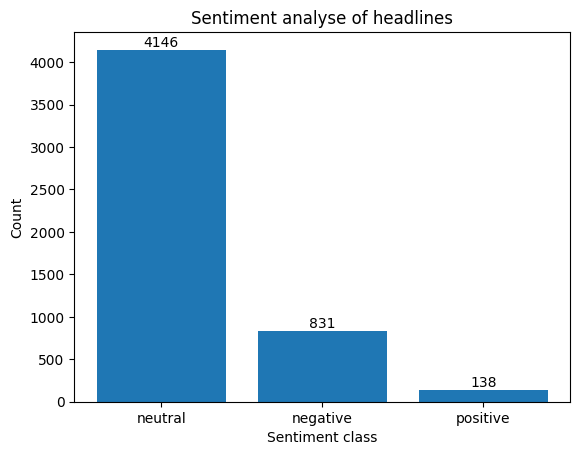

In [49]:
create_sentiment_result_plot(articles, "sentiment_headline")

0 4347
1 744
2 24


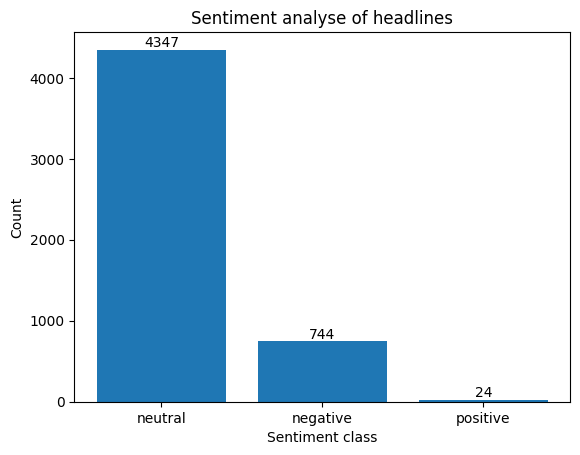

In [50]:
create_sentiment_result_plot(articles, "sentiment_text")

Als nächstes werden die Ergebnisse der Sentiment-Analyse gruppiert nach den einzelnen Kategorien untersucht.

In [77]:
import numpy as np

In [144]:
def create_category_result_plot(df, column, relative=False):
    categories = []
    category_count = []
    negatives = []
    neutrals = []
    positives = []
    for category, count in articles['category'].value_counts().items():
        negatives.append(articles[column][(articles.sentiment_text == 'negative') & (articles.category == category)].count())
        neutrals.append(articles[column][(articles.sentiment_text == 'neutral') & (articles.category == category)].count())
        positives.append(articles[column][(articles.sentiment_text == 'positive') & (articles.category == category)].count())
        categories.append(category)

    if relative:
        for i, category in enumerate(categories):
            count = articles[column][(articles.category == category)].count()
            negatives[i] = negatives[i] / count
            positives[i] = positives[i] / count
            neutrals[i] = neutrals[i] / count

    ind = np.arange(len(categories))
    fig, ax = plt.subplots()
    p1 = ax.bar(ind, positives, label='Positiv', color='seagreen')
    p2 = ax.bar(ind, neutrals, bottom=positives, label='Neutral', color='cornflowerblue')
    p3 = ax.bar(ind, negatives, bottom=[i+j for i,j in zip(positives, neutrals)], label='Negativ', color='lightcoral')
    
    # Hinzufügen von Titeln und Labels
    ax.set_xlabel('Kategorien')
    ax.set_ylabel('Anteile')
    ax.set_xticks(ind)
    ax.set_xticklabels(categories)
    plt.xticks(rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()

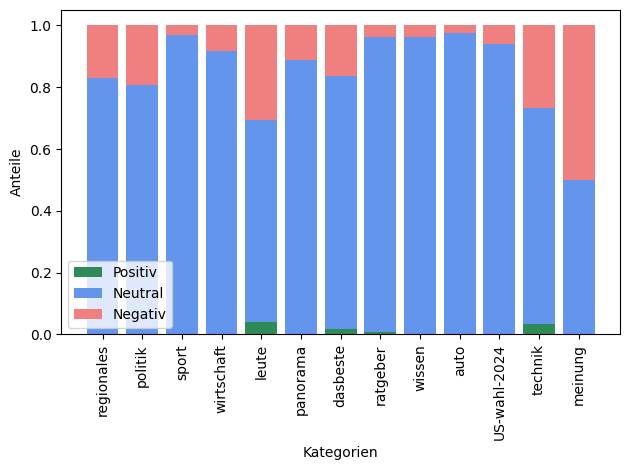

In [145]:
create_category_result_plot(articles, 'sentiment_headline', relative = True)

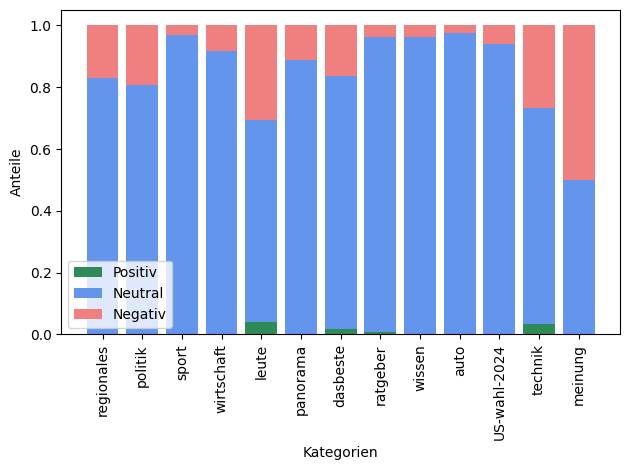

In [146]:
create_category_result_plot(articles, 'sentiment_text', relative = True)